In [65]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import surfa as sf 
from nibabel.freesurfer.io import write_morph_data
import trimesh
from sklearn.preprocessing import MinMaxScaler
import nibabel.freesurfer.io as fsio


In [66]:
FreeSurferOutput='/Users/teahserani/Desktop/Gyri_sulci/FreeSurferOutputs'

In [93]:
subject = '401_5yrOld'

lh_pial_file = f'{FreeSurferOutput}/{subject}/surf/lh.pial'
lh_white_file = f'{FreeSurferOutput}/{subject}/surf/lh.white'
lh_curv_file = f'{FreeSurferOutput}/{subject}/surf/lh.curv'
lh_sulc_file = f'{FreeSurferOutput}/{subject}/surf/lh.sulc'

rh_pial_file = f'{FreeSurferOutput}/{subject}/surf/rh.pial'
rh_white_file = f'{FreeSurferOutput}/{subject}/surf/rh.white'
rh_curv_file = f'{FreeSurferOutput}/{subject}/surf/rh.curv'
rh_sulc_file = f'{FreeSurferOutput}/{subject}/surf/rh.sulc'


In [94]:
lh_pial_mesh = sf.load_mesh(lh_pial_file)
lh_white_mesh = sf.load_mesh(lh_white_file)
lh_curv_mesh = sf.load_overlay(lh_curv_file)
lh_sulc_mesh = sf.load_overlay(lh_sulc_file)

lh_curv = lh_curv_mesh.data
lh_sulc = lh_sulc_mesh.data

rh_pial_mesh = sf.load_mesh(rh_pial_file)
rh_white_mesh = sf.load_mesh(rh_white_file)
rh_curv_mesh = sf.load_overlay(rh_curv_file)
rh_sulc_mesh = sf.load_overlay(rh_sulc_file)

rh_curv = rh_curv_mesh.data
rh_sulc = rh_sulc_mesh.data

In [95]:
np.shape(lh_curv)

(160673,)

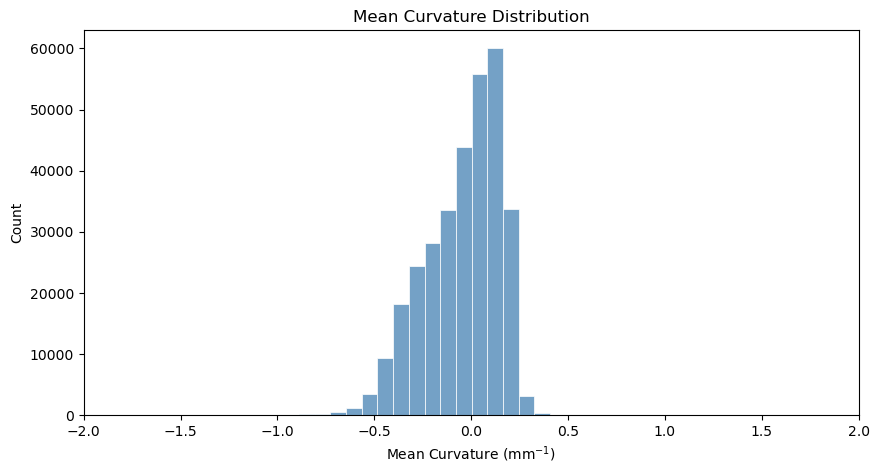

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Combine left and right hemisphere data
curv_all = np.concatenate([lh_curv, rh_curv])

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'Curvature': curv_all,
})

# Plot distributions
plt.figure(figsize=(10, 5))

#plt.subplot(1, 2, 1)
sns.histplot(df['Curvature'], kde=False, bins=100, color='steelblue',edgecolor='white')
plt.xlim(-2,2)
plt.xlabel("Mean Curvature (mm$^{-1}$)")
plt.title('Mean Curvature Distribution')
image_path = os.path.join(path, 'FinalOutputs/MeanCurvature.png')
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.show()

In [98]:
rh_negative_curv = rh_curv[rh_curv < 0]
rh_bottom_threshold = np.percentile(rh_negative_curv, 60)

rh_positive_curv = rh_curv[rh_curv > 0]
rh_top_threshold = np.percentile(rh_positive_curv, 70)

rh_gyri_crown = (rh_curv <= rh_bottom_threshold).astype(np.float32)
rh_sulc_fund = (rh_curv >= rh_top_threshold).astype(np.float32)

fsio.write_morph_data(f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_gy-sulc_Output/CrownFund/rh_gyri_crown.curv', rh_gyri_crown)
fsio.write_morph_data(f'/Users/teahserani/Desktop/Gyri_sulci/SG_Outputs/{subject}_gy-sulc_Output/CrownFund/rh_sulc_fund.curv', rh_sulc_fund)